In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

In [3]:
plz_shape_df = gpd.read_file('GEOdata/howto/plz-gebiete.shp', dtype={'plz': str})

plz_shape_df.head()

,plz,note,geometry
0,52538,"52538 Gangelt, Selfkant","POLYGON ((5.86632 51.05110, 5.86692 51.05124, ..."
1,47559,47559 Kranenburg,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ..."
2,52525,"52525 Waldfeucht, Heinsberg","POLYGON ((5.96811 51.05556, 5.96951 51.05660, ..."
3,52074,52074 Aachen,"POLYGON ((5.97486 50.79804, 5.97495 50.79809, ..."
4,52531,52531 Ãbach-Palenberg,"POLYGON ((6.01507 50.94788, 6.03854 50.93561, ..."


In [4]:
plt.rcParams['figure.figsize'] = [16, 11]

# Get lat and lng of Germany's main cities. 
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nuremberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}

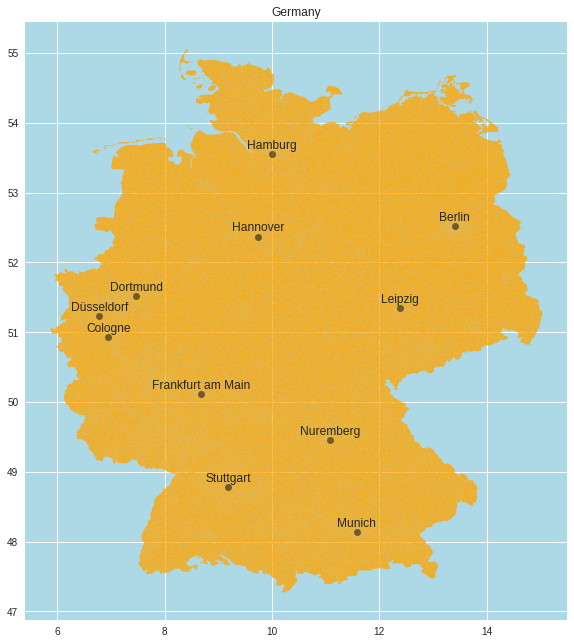

In [5]:
fig, ax = plt.subplots()

plz_shape_df.plot(ax=ax, color='orange', alpha=0.8)

# Plot cities. 
for c in top_cities.keys():
    # Plot city name.
    ax.text(
        x=top_cities[c][0], 
        # Add small shift to avoid overlap with point.
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )
    # Plot city location centroid.
    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany', 
    aspect=1.3, 
    facecolor='lightblue'
);

In [6]:
# Create feature.
plz_shape_df = plz_shape_df.assign(first_dig_plz = lambda x: x['plz'].str.slice(start=0, stop=1))

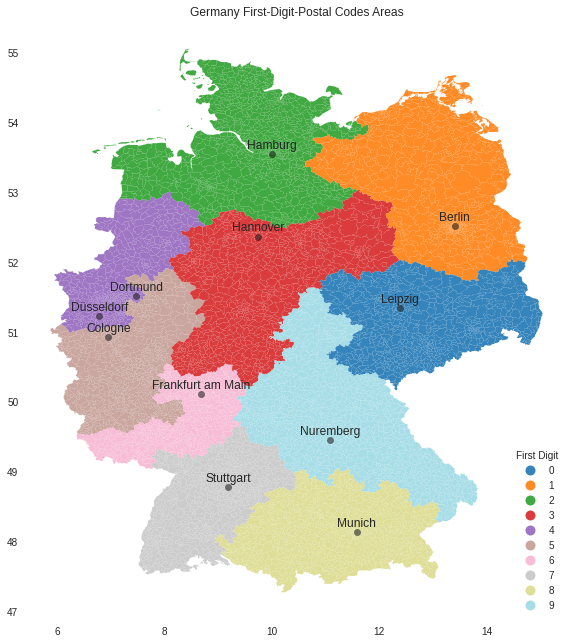

In [7]:
fig, ax = plt.subplots()

plz_shape_df.plot(
    ax=ax, 
    column='first_dig_plz', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'First Digit', 'loc':'lower right'},
    cmap='tab20',
    alpha=0.9
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany First-Digit-Postal Codes Areas', 
    aspect=1.3,
    facecolor='white'
);

In [8]:
plz_region_df = pd.read_csv('GEOdata/howto/zuordnung_plz_ort.csv',
    sep=',', 
    dtype={'plz': str}
)
plz_region_df.head()

,osm_id,ort,plz,bundesland
0,1104550,Aach,78267,Baden-Württemberg
1,1255910,Aach,54298,Rheinland-Pfalz
2,62564,Aachen,52062,Nordrhein-Westfalen
3,62564,Aachen,52064,Nordrhein-Westfalen
4,62564,Aachen,52066,Nordrhein-Westfalen


In [9]:
plz_region_df.drop('osm_id', axis=1, inplace=True)

plz_region_df.head()

,ort,plz,bundesland
0,Aach,78267,Baden-Württemberg
1,Aach,54298,Rheinland-Pfalz
2,Aachen,52062,Nordrhein-Westfalen
3,Aachen,52064,Nordrhein-Westfalen
4,Aachen,52066,Nordrhein-Westfalen


In [10]:
# Merge data.
germany_df = pd.merge(
    left=plz_shape_df, 
    right=plz_region_df, 
    on='plz',
    how='inner'
)

germany_df.drop(['note'], axis=1, inplace=True)

germany_df.head()

,plz,geometry,first_dig_plz,ort,bundesland
0,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",5,Gangelt,Nordrhein-Westfalen
1,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",5,Selfkant,Nordrhein-Westfalen
2,47559,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...",4,Kranenburg,Nordrhein-Westfalen
3,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",5,Heinsberg,Nordrhein-Westfalen
4,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",5,Waldfeucht,Nordrhein-Westfalen


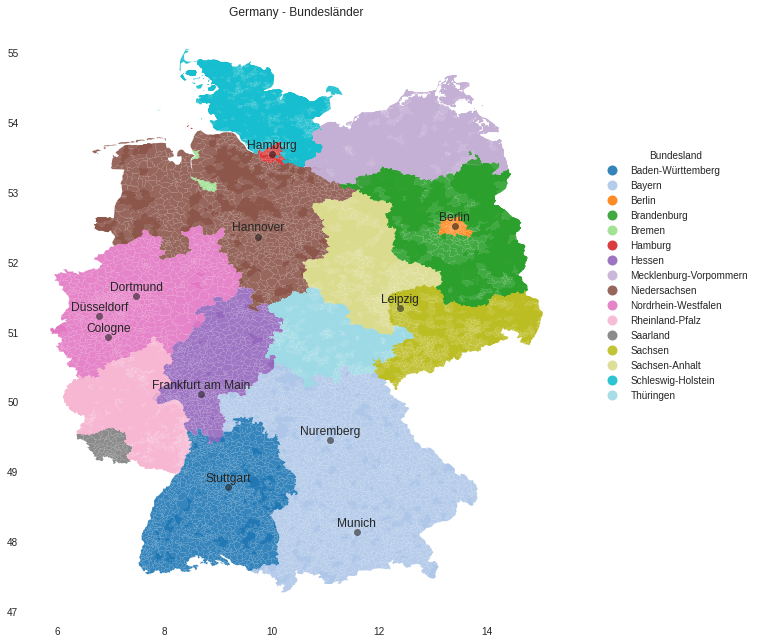

In [11]:
fig, ax = plt.subplots()

germany_df.plot(
    ax=ax, 
    column='bundesland', 
    categorical=True, 
    legend=True, 
    legend_kwds={'title':'Bundesland', 'bbox_to_anchor': (1.35, 0.8)},
    cmap='tab20',
    alpha=0.9
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany - Bundesländer', 
    aspect=1.3, 
    facecolor='white'
);

In [12]:
plz_einwohner_df = pd.read_csv(
    'GEOdata/howto/plz_einwohner.csv', 
    sep=',', 
    dtype={'plz': str, 'einwohner': int}
)

plz_einwohner_df.head()

,plz,einwohner
0,01067,11957
1,01069,25491
2,01097,14821
3,01099,28018
4,01108,5876


In [13]:
#Merge data.
germany_df = pd.merge(
    left=germany_df, 
    right=plz_einwohner_df, 
    on='plz',
    how='left'
)

germany_df.head()

,plz,geometry,first_dig_plz,ort,bundesland,einwohner
0,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",5,Gangelt,Nordrhein-Westfalen,21390
1,52538,"POLYGON ((5.86632 51.05110, 5.86692 51.05124, ...",5,Selfkant,Nordrhein-Westfalen,21390
2,47559,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ...",4,Kranenburg,Nordrhein-Westfalen,10220
3,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",5,Heinsberg,Nordrhein-Westfalen,49737
4,52525,"POLYGON ((5.96811 51.05556, 5.96951 51.05660, ...",5,Waldfeucht,Nordrhein-Westfalen,49737


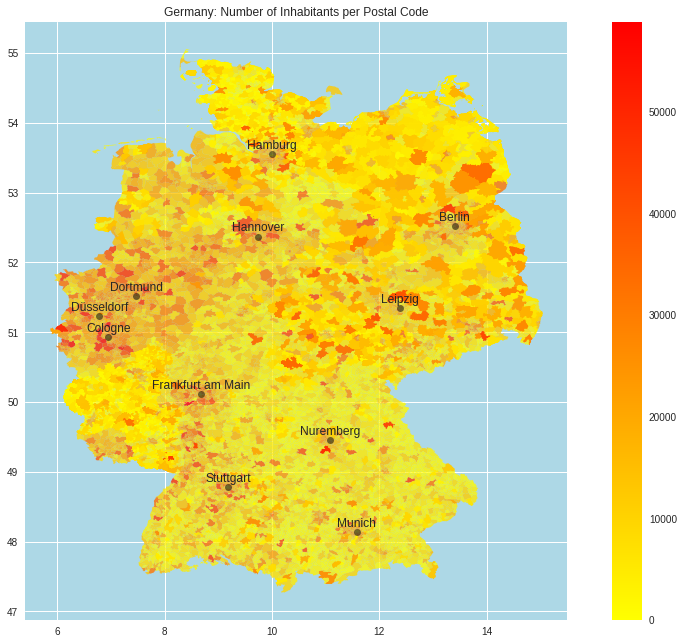

In [14]:
fig, ax = plt.subplots()

germany_df.plot(
    ax=ax, 
    column='einwohner', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
    alpha=0.8
)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Number of Inhabitants per Postal Code', 
    aspect=1.3, 
    facecolor='lightblue'
);

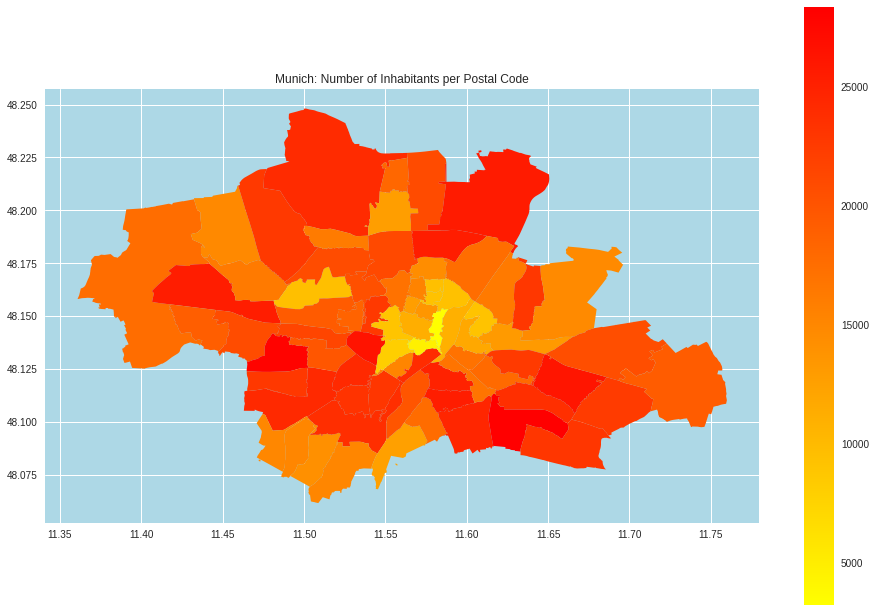

In [15]:
munich_df = germany_df.query('ort == "München"')

fig, ax = plt.subplots()

munich_df.plot(
    ax=ax, 
    column='einwohner', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Munich: Number of Inhabitants per Postal Code', 
    aspect=1.3, 
    facecolor='lightblue'
);

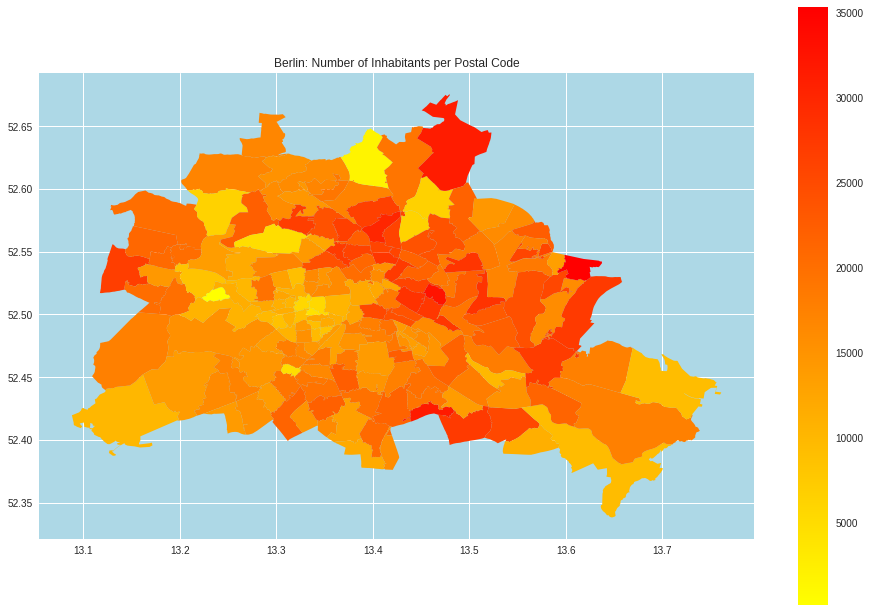

In [16]:
berlin_df = germany_df.query('ort == "Berlin"')

fig, ax = plt.subplots()

berlin_df.plot(
    ax=ax, 
    column='einwohner', 
    categorical=False, 
    legend=True, 
    cmap='autumn_r',
)

ax.set(
    title='Berlin: Number of Inhabitants per Postal Code', 
    aspect=1.3,
    facecolor='lightblue'
);

In [17]:
berlin_df

,plz,geometry,first_dig_plz,ort,bundesland,einwohner
14033,14109,"POLYGON ((13.08835 52.41963, 13.09584 52.42198...",1,Berlin,Berlin,10049
14038,14089,"POLYGON ((13.10929 52.45063, 13.10956 52.45108...",1,Berlin,Berlin,17734
14084,13591,"POLYGON ((13.11738 52.51706, 13.11811 52.52010...",1,Berlin,Berlin,26762
14089,13587,"POLYGON ((13.12796 52.58313, 13.12934 52.58593...",1,Berlin,Berlin,20108
14114,13593,"POLYGON ((13.14288 52.52181, 13.14306 52.52179...",1,Berlin,Berlin,20238
...,...,...,...,...,...,...
14620,12559,"POLYGON ((13.58139 52.44185, 13.58151 52.44239...",1,Berlin,Berlin,17643
14621,12559,"POLYGON ((13.58177 52.44236, 13.58248 52.44299...",1,Berlin,Berlin,17643
14634,12627,"POLYGON ((13.59131 52.53367, 13.59148 52.53485...",1,Berlin,Berlin,35353
14637,12587,"POLYGON ((13.59408 52.45418, 13.59430 52.45452...",1,Berlin,Berlin,17717


In [18]:
type(berlin_df)

geopandas.geodataframe.GeoDataFrame

In [19]:
berlin_df = berlin_df[['plz','geometry','first_dig_plz','einwohner']]

In [20]:
type(berlin_df)

geopandas.geodataframe.GeoDataFrame

In [21]:
berlin_df.to_file('berlin-inhabitants.geojson', driver='GeoJSON')

In [22]:
from geopy import Nominatim

locator = Nominatim(user_agent='myGeocoder')

location = locator.geocode('Humboldt Universität zu Berlin')

print(location)

Humboldt-Universität zu Berlin, 6, Unter den Linden, Spandauer Vorstadt, Mitte, Berlin, Rixdorf, Berlin, 10117, Deutschland


In [23]:
def lat_lng_from_string_loc(x):
    
    locator = Nominatim(user_agent='myGeocoder')

    location = locator.geocode(x)
    
    if location is None:
        None
    else:
        return location.longitude, location.latitude

In [102]:
# Define some well-known Berlin locations.
berlin_locations = [
    'Alexander Platz', 
    'Zoo Berlin', 
    'Berlin Tegel', 
    'Berlin Schönefeld',
    'Berlin Adlershof',
    'Olympia Stadium Berlin',
    'Berlin Südkreuz', 
    'Frei Universität Berlin',
    'Mauerpark', 
    'Treptower Park',
]

In [105]:
berlin_locations

['Alexander Platz',
 'Zoo Berlin',
 'Berlin Tegel',
 'Berlin Schönefeld',
 'Berlin Adlershof',
 'Olympia Stadium Berlin',
 'Berlin Südkreuz',
 'Frei Universität Berlin',
 'Mauerpark',
 'Treptower Park']

In [103]:
# Get geodata.
berlin_locations_geo = {
    x: lat_lng_from_string_loc(x) 
    for x in berlin_locations 
}

# Remove None.
berlin_locations_geo = {
    k: v 
    for k, v in berlin_locations_geo.items()
    if v is not None
}

In [104]:
berlin_locations_geo

{'Alexander Platz': (13.413637435864272, 52.52197645),
 'Zoo Berlin': (13.339369555100077, 52.50844935),
 'Berlin Tegel': (13.2896968, 52.5881913),
 'Berlin Schönefeld': (13.530607882333644, 52.3806943),
 'Berlin Adlershof': (13.5415575, 52.434735),
 'Olympia Stadium Berlin': (13.239098850020545, 52.516472),
 'Berlin Südkreuz': (13.3660396, 52.4765716),
 'Frei Universität Berlin': (13.296031557619791, 52.4550822),
 'Mauerpark': (13.401482055329105, 52.543990949999994),
 'Treptower Park': (13.47034567335738, 52.488428799999994)}

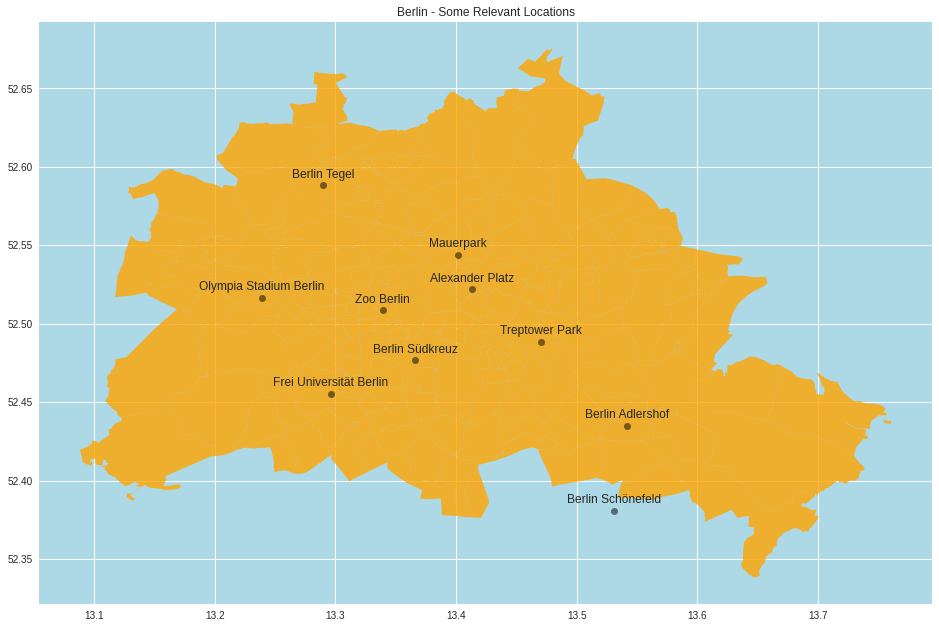

In [26]:
berlin_df = germany_df.query('ort == "Berlin"')

fig, ax = plt.subplots()

berlin_df.plot(
    ax=ax, 
    color='orange', 
    alpha=0.8
)

for c in berlin_locations_geo.keys():

    ax.text(
        x=berlin_locations_geo[c][0], 
        y=berlin_locations_geo[c][1] + 0.005, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        berlin_locations_geo[c][0], 
        berlin_locations_geo[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Berlin - Some Relevant Locations', 
    aspect=1.3,
    facecolor='lightblue'
);

In [82]:
import requests

# GET request.
#response = requests.get(
#    'https://www.berlin.de/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/index/all.json?q='
#)
response = requests.get(
    'https://www.berlin.de/sen/web/service/liefer-und-abholdienste/index.php/index/all.json?q='
)


response_json = response.json()

In [83]:
#response_json
geschaefte_df = pd.DataFrame(response_json['index'])

In [84]:
geschaefte_df.head()

,id,unique_id,name,strasse_nr,plz,art,angebot,lieferung,beschreibung_lieferangebot,selbstabholung,...,fon,w3,mail,montag,dienstag,mittwoch,donnerstag,freitag,samstag,sonntag
0,2821,963,sagrantino 136,Linienstraße 136,10115,"Gastronomie (Café, Restaurant, Imbiss, Lebensm...",Italian fusion kitchen 3 -course menus by Mat...,FALSCH,,WAHR,...,+493027909683,https://www.sagrantino136.com,booking@sagrantino136.com,15:00-20:00,15:00-20:00,15:00-20:00,15:00-20:00,15:00-20:00,15:00-20:00,
1,1801,617,Büroshop Koschel,Invalidenstraße 154,10115,Bürobedarf,Schreib- und Spielwarenladen,WAHR,,FALSCH,...,+49302859659,https://www.claireshop.de,info@claireshop.de,,,,,,,
2,3595,1227,CAFE RIBO,Ackerstraße 157,10115,"Gastronomie (Café, Restaurant, Imbiss, Lebensm...","Maultaschen, schwäbische küche, cafe",FALSCH,,WAHR,...,+4917621455203,https://www.caferibo.de,,09:00-16:00,09:00-16:00,09:00-16:00,09:00-16:00,09:00-16:00,,
3,526,177,Alpenstück,Gartenstraße 9,10115,"Gastronomie (Café, Restaurant, Imbiss, Lebensm...",Süddeutsche Spezialitäten wie Maultaschen Köni...,FALSCH,,WAHR,...,+493021751646,https://alpenstueck.de,info@alpenstueck.de,12:00-18:00,12:00-18:00,12:00-18:00,12:00-18:00,12:00-18:00,12:00-18:00,12:00-18:00
4,787,270,Risorante Bonfini,Chausseestraße 15,10115,"Gastronomie (Café, Restaurant, Imbiss, Lebensm...","Italienische Küche, Pasta und Pizza",FALSCH,,WAHR,...,+493095614848,https://www.bonfini.de,bestellung@bonfini.de,12:00-22:00,12:00-22:00,12:00-22:00,12:00-22:00,12:00-22:00,12:00-22:00,12:00-22:00


In [85]:
geschaefte_df = geschaefte_df[['name','strasse_nr','plz', 'art']]

In [88]:
geschaefte_df

,name,strasse_nr,plz,art,adresse
0,sagrantino 136,Linienstraße 136,10115,"Gastronomie (Café, Restaurant, Imbiss, Lebensm...","Linienstraße 136, 10115 Berlin"
1,Büroshop Koschel,Invalidenstraße 154,10115,Bürobedarf,"Invalidenstraße 154, 10115 Berlin"
2,CAFE RIBO,Ackerstraße 157,10115,"Gastronomie (Café, Restaurant, Imbiss, Lebensm...","Ackerstraße 157, 10115 Berlin"
3,Alpenstück,Gartenstraße 9,10115,"Gastronomie (Café, Restaurant, Imbiss, Lebensm...","Gartenstraße 9, 10115 Berlin"
4,Risorante Bonfini,Chausseestraße 15,10115,"Gastronomie (Café, Restaurant, Imbiss, Lebensm...","Chausseestraße 15, 10115 Berlin"
...,...,...,...,...,...
1243,O2 Shop Schmargendorf,Breite Straße 26,14199,Anderes (bitte bei der nächsten Frage beschrei...,"Breite Straße 26, 14199 Berlin"
1244,Per Donna Mode,Breite Straße 31,14199,Mode / Bekleidung,"Breite Straße 31, 14199 Berlin"
1245,Trattoria La Passione,Hundekehle Straße 38,14199,"Gastronomie (Café, Restaurant, Imbiss, Lebensm...","Hundekehle Straße 38, 14199 Berlin"
1246,Ristorante Marcone,Berkaer Straße,14199,"Gastronomie (Café, Restaurant, Imbiss, Lebensm...","Berkaer Straße, 14199 Berlin"


In [87]:
geschaefte_df['adresse'] = geschaefte_df['strasse_nr'].astype(str) + ", " + geschaefte_df['plz'].astype(str) + " Berlin"

In [89]:
geschaefte_df['lon'] = 0.0
geschaefte_df['lat'] = 0.0

In [93]:
def lat_lng_from_string_loc(x):
    locator = Nominatim(user_agent='myGeocoder')
    location = locator.geocode(x)
    if location is None:
        #None
        return 0.0, 0.0
    else:
        return location.longitude, location.latitude



<ipython-input-93-94412b5c13ea>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geschaefte_df.lon[i] = lon
<ipython-input-93-94412b5c13ea>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geschaefte_df.lat[i] = lat


TypeError: cannot unpack non-iterable NoneType object

In [107]:
#adresses_list = [geschaefte_df['adresse'].astype(list)]
adresses_list = geschaefte_df['adresse'].tolist()

In [108]:
adresses_list

['Linienstraße 136, 10115 Berlin',
 'Invalidenstraße 154, 10115 Berlin',
 'Ackerstraße 157, 10115 Berlin',
 'Gartenstraße 9, 10115 Berlin',
 'Chausseestraße 15, 10115 Berlin',
 'Bergstraße 68, 10115 Berlin',
 'Hannoversche Straße 1, 10115 Berlin',
 'Chausseestraße 60, 10115 Berlin',
 'Brunnenstraße 45, 10115 Berlin',
 'Hannoversche Straße 2, 10115 Berlin',
 'Invalidenstraße 152, 10115 Berlin',
 'eichendorffstraße 1, 10115 Berlin',
 'Torstraße 210, 10115 Berlin',
 'Torstraße 164, 10115 Berlin',
 'Große-Hamburger Straße 38, 10115 Berlin',
 'Invalidenstraße 104, 10115 Berlin',
 'Rheinsberger Straße 1, 10115 Berlin',
 'Scharnhorststraße 28-29, 10115 Berlin',
 'Brunnenstraße 49, 10115 Berlin',
 'Brunnenstraße 43, 10115 Berlin',
 'Chausseestraße 22, 10115 Berlin',
 'Wöhlerstraße 12-13, 10115 Berlin',
 'Linienstraße 113, 10115 Berlin',
 'Chausseestraße 110, 10115 Berlin',
 'Linienstraße 127, 10115 Berlin',
 'Schröderstraße 10, 10115 Berlin',
 'Ackerstraße 173, 10115 Berlin',
 'Torstraße 164, 

In [ ]:
# Get geodata.
berlin_geschaefte_locations_geo = {
    x: lat_lng_from_string_loc(x) 
    for x in adresses_list 
}

# Remove None.
#berlin_geschaefte_locations_geo = {
#    k: v 
#    for k, v in berlin_geschaefte_locations_geo.items()
#    if v is not None
#}

In [ ]:
berlin_geschaefte_locations_geo[0:2]

In [ ]:
#gdf = geopandas.GeoDataFrame(geometry=geopandas.points_from_xy(y))

liste = []
for x, y in berlin_geschaefte_locations_geo.items():
    #print(x, y)
    liste.append(y)
    #print(y)
liste
geschaefte_df['geometry'] = liste
geschaefte_df.head(10)

In [ ]:
# Get geodata.
for i in range(len(geschaefte_df)):
    lon , lat = lat_lng_from_string_loc(geschaefte_df.adresse[i])
    geschaefte_df.lon[i] = lon
    geschaefte_df.lat[i] = lat

In [98]:
geschaefte_df

,name,strasse_nr,plz,art,adresse,lon,lat
0,sagrantino 136,Linienstraße 136,10115,"Gastronomie (Café, Restaurant, Imbiss, Lebensm...","Linienstraße 136, 10115 Berlin",13.389051,52.526332
1,Büroshop Koschel,Invalidenstraße 154,10115,Bürobedarf,"Invalidenstraße 154, 10115 Berlin",13.396187,52.532237
2,CAFE RIBO,Ackerstraße 157,10115,"Gastronomie (Café, Restaurant, Imbiss, Lebensm...","Ackerstraße 157, 10115 Berlin",13.396607,52.530929
3,Alpenstück,Gartenstraße 9,10115,"Gastronomie (Café, Restaurant, Imbiss, Lebensm...","Gartenstraße 9, 10115 Berlin",13.391933,52.530197
4,Risorante Bonfini,Chausseestraße 15,10115,"Gastronomie (Café, Restaurant, Imbiss, Lebensm...","Chausseestraße 15, 10115 Berlin",13.384582,52.529575
...,...,...,...,...,...,...,...
1243,O2 Shop Schmargendorf,Breite Straße 26,14199,Anderes (bitte bei der nächsten Frage beschrei...,"Breite Straße 26, 14199 Berlin",0.000000,0.000000
1244,Per Donna Mode,Breite Straße 31,14199,Mode / Bekleidung,"Breite Straße 31, 14199 Berlin",0.000000,0.000000
1245,Trattoria La Passione,Hundekehle Straße 38,14199,"Gastronomie (Café, Restaurant, Imbiss, Lebensm...","Hundekehle Straße 38, 14199 Berlin",0.000000,0.000000
1246,Ristorante Marcone,Berkaer Straße,14199,"Gastronomie (Café, Restaurant, Imbiss, Lebensm...","Berkaer Straße, 14199 Berlin",0.000000,0.000000


In [97]:
geschaefte_df.query('lon == "0.000000"')

,name,strasse_nr,plz,art,adresse,lon,lat
21,Swipeby.de,Wöhlerstraße 12-13,10115,"Gastronomie (Café, Restaurant, Imbiss, Lebensm...","Wöhlerstraße 12-13, 10115 Berlin",0.0,0.0
22,Bötzow Privat,Linienstraße 113,10115,"Gastronomie (Café, Restaurant, Imbiss, Lebensm...","Linienstraße 113, 10115 Berlin",0.0,0.0
23,Fastfood,Chausseestraße 110,10115,Baumarkt,"Chausseestraße 110, 10115 Berlin",0.0,0.0
24,Chimosa,Linienstraße 127,10115,Gesundheit,"Linienstraße 127, 10115 Berlin",0.0,0.0
25,GUT.GUT.,Schröderstraße 10,10115,Getränkemarkt,"Schröderstraße 10, 10115 Berlin",0.0,0.0
...,...,...,...,...,...,...,...
1243,O2 Shop Schmargendorf,Breite Straße 26,14199,Anderes (bitte bei der nächsten Frage beschrei...,"Breite Straße 26, 14199 Berlin",0.0,0.0
1244,Per Donna Mode,Breite Straße 31,14199,Mode / Bekleidung,"Breite Straße 31, 14199 Berlin",0.0,0.0
1245,Trattoria La Passione,Hundekehle Straße 38,14199,"Gastronomie (Café, Restaurant, Imbiss, Lebensm...","Hundekehle Straße 38, 14199 Berlin",0.0,0.0
1246,Ristorante Marcone,Berkaer Straße,14199,"Gastronomie (Café, Restaurant, Imbiss, Lebensm...","Berkaer Straße, 14199 Berlin",0.0,0.0


In [29]:
berlin_maerkte_raw_df = pd.DataFrame(response_json['index'])

In [30]:
berlin_maerkte_df = berlin_maerkte_raw_df[['name', 'bezirk', 'plz_ort', 'lat', 'lng']]

berlin_maerkte_df = berlin_maerkte_df \
    .query('lat != ""') \
    .assign(plz = lambda x: x['plz_ort'].str.split(' ').apply(lambda x: x[0]).astype(str)) \
    .drop('plz_ort', axis=1)

# Convert to float.
berlin_maerkte_df['lat'] = berlin_maerkte_df['lat'].str.replace(',', '.').astype(float)
berlin_maerkte_df['lng'] = berlin_maerkte_df['lng'].str.replace(',', '.').astype(float)

berlin_maerkte_df.head()

,name,bezirk,lat,lng,plz
0,Weihnachtsmarkt vor dem Schloss Charlottenburg,Charlottenburg-Wilmersdorf,52.519951,13.295946,14059
1,36. Weihnachtsmarkt an der Gedächtniskirche,Charlottenburg-Wilmersdorf,52.504886,13.335511,10789
2,Weihnachtsmarkt in der Fußgängerzone Wilmersdo...,Charlottenburg-Wilmersdorf,52.509313,13.305994,10627
3,Weihnachten in Westend,Charlottenburg-Wilmersdorf,52.512538,13.259213,14052
4,Weihnachtsmarkt Berlin-Grunewald des Johannisc...,Charlottenburg-Wilmersdorf,52.488350,13.277250,14193


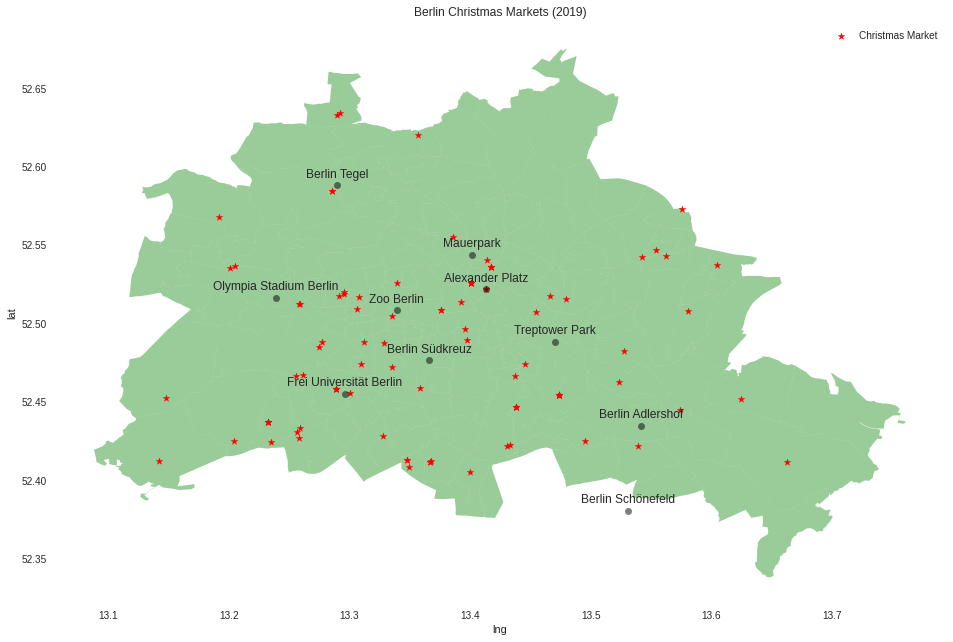

In [31]:
fig, ax = plt.subplots()

berlin_df.plot(ax=ax, color= 'green', alpha=0.4)

for c in berlin_locations_geo.keys():

    ax.text(
        x=berlin_locations_geo[c][0], 
        y=berlin_locations_geo[c][1] + 0.005, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        berlin_locations_geo[c][0], 
        berlin_locations_geo[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

berlin_maerkte_df.plot(
    kind='scatter', 
    x='lng', 
    y='lat', 
    c='r', 
    marker='*',
    s=50,
    label='Christmas Market',  
    ax=ax
)

ax.set(
    title='Berlin Christmas Markets (2019)', 
    aspect=1.3, 
    facecolor='white'
);